In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('creditcard.csv')

In [3]:
df=data.copy()

In [4]:
data.isnull().sum().max()

0

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print('No Frauds',round(100*data['Class'].value_counts()[0]/len(data),2),'% of the dataset')
print('Frauds',round(100*data['Class'].value_counts()[1]/len(data),2),'% of the dataset')


No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [7]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

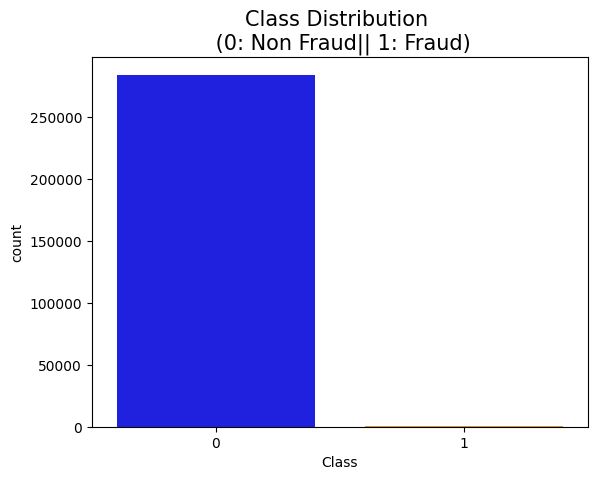

In [8]:
colors=['#0000FF','#FFA500']

sns.countplot(data=data, x='Class',palette=colors)
plt.title('Class Distribution \n (0: Non Fraud|| 1: Fraud)', fontsize=15)
plt.show()

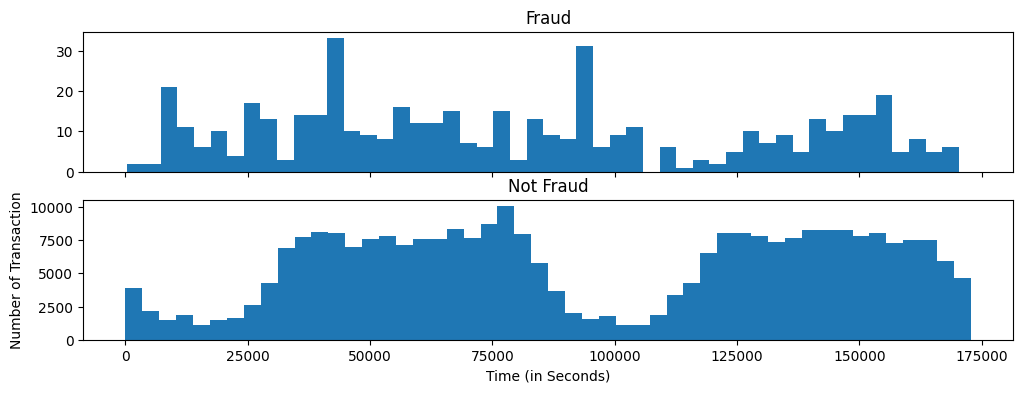

In [9]:
fig, (ax1,ax2)=plt.subplots(2,1, sharex=True, figsize=(12,4))

ax1.hist(df.Time[df.Class==1],bins=50)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class==0],bins=50)
ax2.set_title('Not Fraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transaction')
plt.show();

In [10]:
np.pi

3.141592653589793

In [11]:
#cylidrical coding
seconds_in_day=24*60*60

df['sin_time']=np.sin(2*np.pi*df.Time/seconds_in_day)
df['cos_time']=np.cos(2*np.pi*df.Time/seconds_in_day)

df.drop('Time', axis=1, inplace=True)


In [12]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler=MinMaxScaler(feature_range=(0,1))
df['scaled_amount']=mm_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df.drop('Amount', axis=1, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# seprerating input and output
y=df.Class
X=df.drop('Class', axis=1)

# setting up testing and training set
X_train, X_test, Y_train, Y_test=train_test_split(X,y, test_size=0.25, random_state=27)

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import average_precision_score



## First we model data as is:

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr=LogisticRegression(solver='liblinear').fit(X_train,Y_train)

# predicting
lr_pred=lr.predict(X_test)

f1=f1_score(Y_test,lr_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,lr_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,lr_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,lr_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,lr_pred)
print('Averge precision:',average_precision)







F1 Score: 0.7466666666666666
Precision Score: 0.9032258064516129
Recall Score: 0.6363636363636364
Accuracy Score: 0.9991994606893064
Averge precision: 0.5754541970179261


In [18]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc=RandomForestClassifier(n_estimators=10).fit(X_train,Y_train)

# predicting
rfc_pred=rfc.predict(X_test)

f1=f1_score(Y_test,rfc_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,rfc_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,rfc_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,rfc_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,rfc_pred)
print('Averge precision:',average_precision)


F1 Score: 0.8739495798319327
Precision Score: 0.9811320754716981
Recall Score: 0.7878787878787878
Accuracy Score: 0.9995786635206876
Averge precision: 0.7734063977523324


In [20]:
# KNN Classsifer

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
#knc=KNeighborsClassifier(n_neighbors=2)

In [23]:
knc=KNeighborsClassifier(n_neighbors=2).fit(X_train,Y_train)

# predicting
knc_pred=knc.predict(X_test)

f1=f1_score(Y_test,knc_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,knc_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,knc_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,knc_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,knc_pred)
print('Averge precision:',average_precision)

F1 Score: 0.8384279475982532
Precision Score: 0.9896907216494846
Recall Score: 0.7272727272727273
Accuracy Score: 0.9994803516755147
Averge precision: 0.7202806740657091


In [24]:
# Support Vector Machine

In [25]:
from sklearn import svm

In [26]:
clf=svm.SVC()

clf.fit(X_train,Y_train)

# predicting
svm_pred=clf.predict(X_test)

f1=f1_score(Y_test,svm_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,svm_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,svm_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,svm_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,svm_pred)
print('Averge precision:',average_precision)

F1 Score: 0.8260869565217391
Precision Score: 0.9693877551020408
Recall Score: 0.7196969696969697
Accuracy Score: 0.9994382180275835
Averge precision: 0.6981850781327722


In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
mlp=MLPClassifier(activation='logistic')

mlp.fit(X_train,Y_train)

# predicting
mlp_pred=mlp.predict(X_test)

f1=f1_score(Y_test,mlp_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,mlp_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,mlp_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,mlp_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,mlp_pred)
print('Averge precision:',average_precision)


F1 Score: 0.8582995951417004
Precision Score: 0.9217391304347826
Recall Score: 0.803030303030303
Accuracy Score: 0.9995084407741356
Averge precision: 0.7405496115100022


# Lets try these same classifier with over sampling the under represented(fraud-Class) data

In [29]:
from sklearn.utils import resample

In [30]:
y=df.Class
x=df.drop('Class', axis=1)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25, random_state=27)

#Concating our training set together
X=pd.concat([X_train, Y_train], axis=1)

#Seperate minority and majority class
not_fraud=X[X.Class==0]
fraud=X[X.Class==1]

#upsample the fraud class
fraud_upsampled=resample(fraud, replace=True, n_samples=len(not_fraud), random_state=27)

# combining both 
upsampled=pd.concat([not_fraud,fraud_upsampled])

y_train=upsampled.Class
x_train=upsampled.drop('Class', axis=1)

In [31]:
upsampled=LogisticRegression(solver='liblinear').fit(x_train,y_train)

# predicting
upsampled_pred=upsampled.predict(X_test)

f1=f1_score(Y_test,upsampled_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,upsampled_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,upsampled_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,upsampled_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,upsampled_pred)
print('Averge precision:',average_precision)

F1 Score: 0.1248665955176094
Precision Score: 0.06716417910447761
Recall Score: 0.8863636363636364
Accuracy Score: 0.9769669391309233
Averge precision: 0.059742554264079525


In [32]:
upsampled=RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

# predicting
upsampled_pred=upsampled.predict(X_test)

f1=f1_score(Y_test,upsampled_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,upsampled_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,upsampled_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,upsampled_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,upsampled_pred)
print('Averge precision:',average_precision)

F1 Score: 0.846153846153846
Precision Score: 0.9705882352941176
Recall Score: 0.75
Accuracy Score: 0.9994943962248252
Averge precision: 0.7284046465978318


In [33]:
upsampled=KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)

# predicting
upsampled_pred=upsampled.predict(X_test)

f1=f1_score(Y_test,upsampled_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,upsampled_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,upsampled_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,upsampled_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,upsampled_pred)
print('Averge precision:',average_precision)

F1 Score: 0.8571428571428572
Precision Score: 0.9292035398230089
Recall Score: 0.7954545454545454
Accuracy Score: 0.9995084407741356
Averge precision: 0.7395183822360473


In [34]:
upsampled=MLPClassifier(activation='logistic')

upsampled.fit(x_train,y_train)

# predicting
upsampled_pred=upsampled.predict(X_test)

f1=f1_score(Y_test,upsampled_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,upsampled_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,upsampled_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,upsampled_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,upsampled_pred)
print('Averge precision:',average_precision)


F1 Score: 0.7730496453900709
Precision Score: 0.7266666666666667
Recall Score: 0.8257575757575758
Accuracy Score: 0.9991011488441336
Averge precision: 0.6003735296846445


# Lets try these same classifier with under sampling the over represented(non fraud-Class) data

In [35]:
#upsample the fraud class
not_fraud_downsampled=resample(not_fraud, replace=True, n_samples=len(fraud), random_state=27)

# combining both 
downsampled=pd.concat([not_fraud_downsampled,fraud])

y_train=downsampled.Class
x_train=downsampled.drop('Class', axis=1)

In [36]:
downsampled=LogisticRegression(solver='liblinear').fit(x_train,y_train)

# predicting
downsampled_pred=downsampled.predict(X_test)

f1=f1_score(Y_test,downsampled_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,downsampled_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,downsampled_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,downsampled_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,downsampled_pred)
print('Averge precision:',average_precision)

F1 Score: 0.11884205180294566
Precision Score: 0.06369080021774633
Recall Score: 0.8863636363636364
Accuracy Score: 0.9756327069464341
Averge precision: 0.056663877523567704


In [37]:
downsampled=RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

# predicting
downsampled_pred=downsampled.predict(X_test)

f1=f1_score(Y_test,downsampled_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,downsampled_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,downsampled_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,downsampled_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,downsampled_pred)
print('Averge precision:',average_precision)

F1 Score: 0.13814180929095354
Precision Score: 0.07513297872340426
Recall Score: 0.8560606060606061
Accuracy Score: 0.9801971854723182
Averge precision: 0.06458522973799391


In [38]:
downsampled=KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)

# predicting
downsampled_pred=downsampled.predict(X_test)

f1=f1_score(Y_test,downsampled_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,downsampled_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,downsampled_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,downsampled_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,downsampled_pred)
print('Averge precision:',average_precision)

F1 Score: 0.24191866527632952
Precision Score: 0.14026602176541716
Recall Score: 0.8787878787878788
Accuracy Score: 0.98978961265133
Averge precision: 0.123488792522212


In [39]:
downsampled=svm.SVC()

downsampled.fit(x_train,y_train)

# predicting
downsampled_pred=downsampled.predict(X_test)

f1=f1_score(Y_test,downsampled_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,downsampled_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,downsampled_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,downsampled_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,downsampled_pred)
print('Averge precision:',average_precision)

F1 Score: 0.18991596638655464
Precision Score: 0.10680529300567108
Recall Score: 0.8560606060606061
Accuracy Score: 0.9864610544647622
Averge precision: 0.09169865029781324


In [40]:
downsampled=MLPClassifier(activation='logistic')

downsampled.fit(x_train,y_train)

# predicting
downsampled_pred=downsampled.predict(X_test)

f1=f1_score(Y_test,downsampled_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,downsampled_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,downsampled_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,downsampled_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,downsampled_pred)
print('Averge precision:',average_precision)

C:\Users\kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


F1 Score: 0.10694698354661791
Precision Score: 0.05690661478599222
Recall Score: 0.8863636363636364
Accuracy Score: 0.9725569506474537
Averge precision: 0.050650622254512924


# Lets try over-sampling the under-represented class using SMOTE(Synthetic Minority Over-sampling Technique) algorithm.

In [41]:
from imblearn.over_sampling import SMOTE

# Seperate input features and target
y=df.Class
x=df.drop('Class', axis=1)

#Setting up testing and training set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=27)

sm=SMOTE(random_state=27)
x_train, y_train=sm.fit_resample(X_train, Y_train) 

In [42]:
#  Over-sampling the under-represented class using SMOTE algorithm and LogisticRegression
smote=LogisticRegression(solver='liblinear').fit(x_train,y_train)

# predicting
smote_pred=smote.predict(X_test)

f1=f1_score(Y_test,smote_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,smote_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,smote_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,smote_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,smote_pred)
print('Averge precision:',average_precision)

F1 Score: 0.11830698623151452
Precision Score: 0.0634226353198469
Recall Score: 0.8787878787878788
Accuracy Score: 0.9757169742422965
Averge precision: 0.05595975594883206


In [43]:
#  Over-sampling the under-represented class using SMOTE algorithm and RandomForest
smote=RandomForestClassifier(n_estimators=10).fit(x_train,y_train)

# predicting
smote_pred=smote.predict(X_test)

f1=f1_score(Y_test,smote_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,smote_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,smote_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,smote_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,smote_pred)
print('Averge precision:',average_precision)

F1 Score: 0.8537549407114625
Precision Score: 0.8925619834710744
Recall Score: 0.8181818181818182
Accuracy Score: 0.9994803516755147
Averge precision: 0.7306150556597836


In [44]:
#  Over-sampling the under-represented class using SMOTE algorithm and KNearestNeighbors Classifier
smote=KNeighborsClassifier(n_neighbors=2).fit(x_train,y_train)

# predicting
smote_pred=smote.predict(X_test)

f1=f1_score(Y_test,smote_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,smote_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,smote_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,smote_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,smote_pred)
print('Averge precision:',average_precision)


F1 Score: 0.8075471698113208
Precision Score: 0.8045112781954887
Recall Score: 0.8106060606060606
Accuracy Score: 0.999283727985169
Averge precision: 0.6524928316639519


In [45]:
#  Over-sampling the under-represented class using SMOTE algorithm and Neural Networks

smote=MLPClassifier(activation='logistic')

smote.fit(x_train,y_train)

# predicting
smote_pred=smote.predict(X_test)

f1=f1_score(Y_test,smote_pred)
print('F1 Score:',f1)
precision=precision_score(Y_test,smote_pred)
print('Precision Score:',precision)
recall=recall_score(Y_test,smote_pred)
print('Recall Score:',recall)
accuracy=accuracy_score(Y_test,smote_pred)
print('Accuracy Score:',accuracy)
average_precision=average_precision_score(Y_test,smote_pred)
print('Averge precision:',average_precision)

F1 Score: 0.7985347985347986
Precision Score: 0.7730496453900709
Recall Score: 0.8257575757575758
Accuracy Score: 0.9992275497879273
Averge precision: 0.6386746257516981
